# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Francis%20Galton%20Regression%20Data.txt')

In [ ]:
df.head()

,Family\tFather\tMother\tGender\tHeight\tKids
0,1\t78.5\t67\tM\t73.2\t4
1,1\t78.5\t67\tF\t69.2\t4
2,1\t78.5\t67\tF\t69\t4
3,1\t78.5\t67\tF\t69\t4
4,2\t75.5\t66.5\tM\t73.5\t4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 1 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Family	Father	Mother	Gender	Height	Kids  898 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [ ]:
#Shows only 1 column as it is a 'tsv' file

In [ ]:
df.describe()

,Family\tFather\tMother\tGender\tHeight\tKids
count,898
unique,786
top,166\t67.5\t65\tF\t63\t11
freq,5


# Import Data

In [ ]:
df = pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Francis%20Galton%20Regression%20Data.txt', delimiter= '\t')
#convert tsv to csv using delimiter= '\t'

In [ ]:
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Family  898 non-null    object 
 1   Father  898 non-null    float64
 2   Mother  898 non-null    float64
 3   Gender  898 non-null    object 
 4   Height  898 non-null    float64
 5   Kids    898 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 42.2+ KB


In [ ]:
df.describe()

,Father,Mother,Height,Kids
count,898.000000,898.000000,898.000000,898.000000
mean,69.232851,64.084410,66.760690,6.135857
std,2.470256,2.307025,3.582918,2.685156
min,62.000000,58.000000,56.000000,1.000000
25%,68.000000,63.000000,64.000000,4.000000
50%,69.000000,64.000000,66.500000,6.000000
75%,71.000000,65.500000,69.700000,8.000000
max,78.500000,70.500000,79.000000,15.000000


## Prob1 - Calculate correlation between Height,Father and Mother

In [ ]:
df.corr()

,Father,Mother,Height,Kids
Father,1.000000,0.073665,0.275355,-0.160023
Mother,0.073665,1.000000,0.201655,-0.020030
Height,0.275355,0.201655,1.000000,-0.126910
Kids,-0.160023,-0.020030,-0.126910,1.000000


## Prob2 - Creating a matrix of scatterplots of the colums Height, Father and Mother

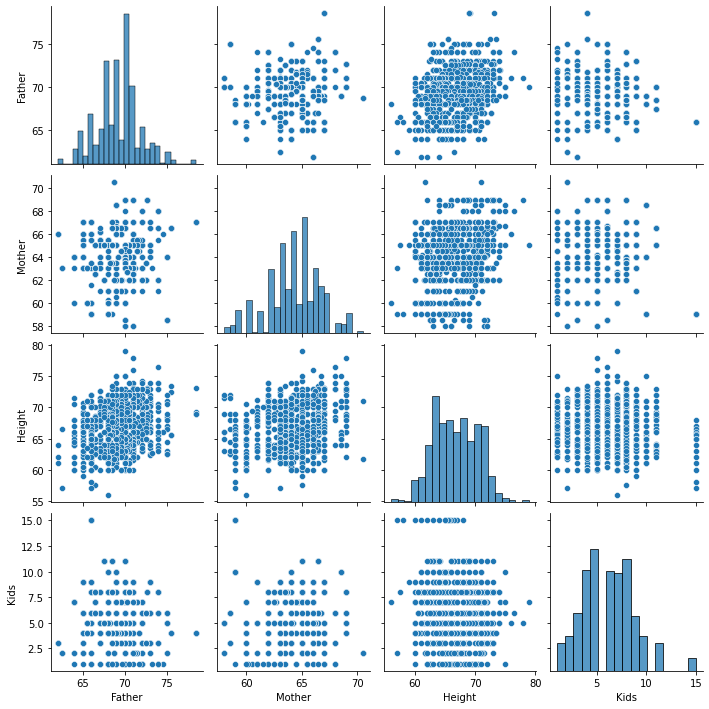

In [ ]:
sns.pairplot(df)

## Fit sample Regression Height(y) and Father(X)

In [ ]:
y = df['Height']

In [ ]:
X = df['Father']

In [ ]:
slope = ((df['Father']-df['Father'].mean())*(df['Height']-df['Height'].mean())).sum() / ((df['Father']-df['Father'].mean())**2).sum()

In [ ]:
slope

0.3993812658985653

In [ ]:
intercept = y.mean()-slope*X.mean()

In [ ]:
intercept

39.110386837075346

In [ ]:
X = df[['Father']]
y = df['Height']
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.intercept_)
print(lr.coef_)
#Attaining same ans using sklearn

39.11038683707541
[0.39938127]


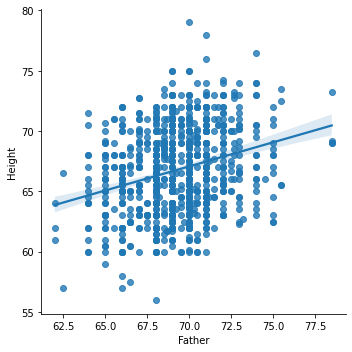

In [ ]:
sns.lmplot(x= 'Father', y='Height', data=df)
#Regression line fitted

In [ ]:
df['Gender'] = df['Gender'].replace({'M' : 0, 'F' : 1})   #Replaced df['Gender'] is saved in new df['Gender']
X = df[['Gender', 'Father', 'Mother']]
y = df['Height']
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.intercept_)
print(lr.coef_)
#if unit of height is in inces, it implies that for every 1 inch increment in father or mothers height results in 0.40 or 0.32 inch increment in kids
#Gender is categorical, so no units applicable

20.570711329351845
[-5.22595131  0.40597803  0.32149514]


In [ ]:
df['Gender']
#M,F replaced with 0,1

0      0
1      1
2      1
3      1
4      0
      ..
893    0
894    0
895    1
896    1
897    1
Name: Gender, Length: 898, dtype: int64

##Prob - compute the correlaration in height between mother and daughter, mother and sons, father and daughter, and father and sons

In [ ]:
df.groupby(['Gender']).corr()

Father    Mother    Height      Kids
Gender                                               
0      Father  1.000000  0.106335  0.391317 -0.091266
       Mother  0.106335  1.000000  0.334131 -0.004485
       Height  0.391317  0.334131  1.000000 -0.112378
       Kids   -0.091266 -0.004485 -0.112378  1.000000
1      Father  1.000000  0.041074  0.458761 -0.226864
       Mother  0.041074  1.000000  0.313698 -0.041436
       Height  0.458761  0.313698  1.000000 -0.122937
       Kids   -0.226864 -0.041436 -0.122937  1.000000